In [147]:
import pandas as pd
import numpy as np
from statsmodels.stats.multitest import multipletests

# -------------------------------
# 1. Load the main table (p-values)
# -------------------------------
gene_type = "oligo_gene"

df = pd.read_csv(
    "/Volumes/Wanglab_HDD1/UTSW/Xinyue/AD_Cell_Type/Spatial_autocorrelation/B6_MRI/output/SA_corrected_spearmanpvalues_B6_" 
    + gene_type + ".csv"
)

# Remove the first row
df = df.iloc[1:].reset_index(drop=True)

# -------------------------------
# 2. Load gene names
# -------------------------------
gene_df = pd.read_csv(
    "/Volumes/Wanglab_HDD1/UTSW/Xinyue/AD_Cell_Type/Data_for_correlation/3B6_" 
    + gene_type + "_expression_matrix_matchedspots_Ydata_updated_updated.csv"
)

# Drop first column
gene_df = gene_df.drop(gene_df.columns[0], axis=1)

gene_names = list(gene_df.columns)

# -------------------------------
# 3. Add gene names as index
# -------------------------------
if len(df) != len(gene_names):
    print("Warning: row number mismatch!")
    print(f"Rows in df: {len(df)}, gene names: {len(gene_names)}")

df.insert(0, "gene_name", gene_names)
df = df.set_index("gene_name")

# -------------------------------
# 4. FDR correction (column-wise)
# -------------------------------
fdr_df = pd.DataFrame(index=df.index)

for col in df.columns:
    pvals = df[col].astype(float).values

    # Handle NaNs safely
    valid = ~np.isnan(pvals)

    qvals = np.full_like(pvals, np.nan, dtype=float)

    if valid.sum() > 0:
        _, qvals_valid, _, _ = multipletests(
            pvals[valid],
            alpha=0.05,
            method="fdr_bh"
        )
        qvals[valid] = qvals_valid

    fdr_df[col] = qvals

# -------------------------------
# 5. Save outputs
# -------------------------------
df.to_csv(
    "/Volumes/Wanglab_HDD1/UTSW/Xinyue/AD_Cell_Type/Data_for_correlation/"
    "SA_corrected_spearmanpvalues_B6_" + gene_type + "_addnames.csv"
)

fdr_df.to_csv(
    "/Volumes/Wanglab_HDD1/UTSW/Xinyue/AD_Cell_Type/Data_for_correlation/"
    "SA_corrected_FDR_spearmanqvalues_B6_" + gene_type + "_addnames.csv"
)

print("Saved p-value table with gene names")
print("Saved FDR-corrected q-value table (column-wise)")



Saved p-value table with gene names
Saved FDR-corrected q-value table (column-wise)


-0.6593064025148219
0.6727449831230695


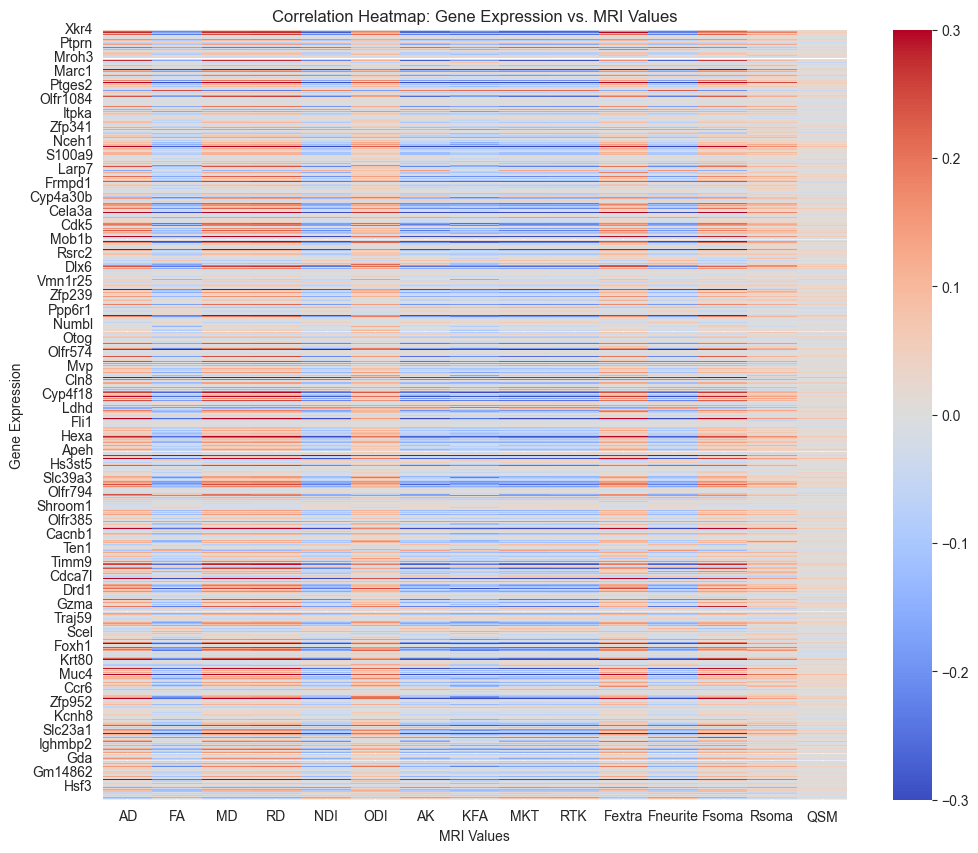

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

gene_type = "gene"
df = pd.read_csv("/Volumes/Wanglab_HDD1/UTSW/Xinyue/AD_Cell_Type/Data_for_correlation/spearmanrvalues_5xFAD_" + gene_type + "_addnames.csv")    
df = df.set_index(df.columns[0])  # assumes first column is 'gene_name'
#numeric_df = df.select_dtypes(include='number')
# Suppose df is your DataFrame
min_val = df.min().min()
max_val = df.max().max()
print(min_val)
print(max_val)
plt.figure(figsize=(12, 10)) # Adjust figure size for readability

# Plot the original correlation matrix without masking
# Set vmin and vmax to control the colorbar range
sns.heatmap(df, cmap='coolwarm', annot=False, vmin=-0.3, vmax=0.3) # Use 'coolwarm' colormap
plt.title(f'Correlation Heatmap: Gene Expression vs. MRI Values')
plt.xlabel('MRI Values')
plt.ylabel('Gene Expression')
plt.show()


In [161]:

import pandas as pd

gene_type = "oligo_gene"
# Parameters
p_threshold = 0.05  # significance cutoff

# Load p-value table
df = pd.read_csv("/Volumes/Wanglab_HDD1/UTSW/Xinyue/AD_Cell_Type/Data_for_correlation/SA_corrected_FDR_spearmanqvalues_B6_" + gene_type + "_addnames.csv", index_col=0)  # assume first column is gene names

# Loop over MRI columns
for mri_col in df.columns:
    # Extract genes and p-values
    temp = df[[mri_col]].copy()
    temp = temp.rename(columns={mri_col: "pvalue"})
    temp["gene"] = temp.index

    # Filter significant (0 < p < p_threshold)
    sig = temp[(temp["pvalue"] > 0) & (temp["pvalue"] < p_threshold)]


    # Sort by p-value ascending
    sig = sig.sort_values("pvalue")

    # Save to CSV
    sig.to_csv(f"/Volumes/Wanglab_HDD1/UTSW/Xinyue/AD_Cell_Type/Data_for_correlation/significant_gene_results/B6_significant_genes_{mri_col}_" + gene_type + ".csv", index=False)
    # # Select top 200 (or fewer if <200)
    top200 = sig.head(200)
    # 
    # # Save CSV
    top200.to_csv(f"/Volumes/Wanglab_HDD1/UTSW/Xinyue/AD_Cell_Type/Data_for_correlation/significant_gene_results/B6_top200_genes_{mri_col}_" + gene_type + ".csv", index=False)

    print(f"{mri_col}: saved {len(top200)} genes.")
    print(f"{mri_col}: {len(sig)} significant genes saved.")


NDI: saved 51 genes.
NDI: 51 significant genes saved.
QSM: saved 0 genes.
QSM: 0 significant genes saved.
Rsoma: saved 72 genes.
Rsoma: 72 significant genes saved.
ad: saved 104 genes.
ad: 104 significant genes saved.
ak: saved 54 genes.
ak: 54 significant genes saved.
fa: saved 69 genes.
fa: 69 significant genes saved.
fextra: saved 62 genes.
fextra: 62 significant genes saved.
fneurite: saved 49 genes.
fneurite: 49 significant genes saved.
fsoma: saved 84 genes.
fsoma: 84 significant genes saved.
kfa: saved 72 genes.
kfa: 72 significant genes saved.
md: saved 50 genes.
md: 50 significant genes saved.
mkt: saved 46 genes.
mkt: 46 significant genes saved.
odi: saved 6 genes.
odi: 6 significant genes saved.
rd: saved 51 genes.
rd: 51 significant genes saved.
rtk: saved 46 genes.
rtk: 46 significant genes saved.


In [211]:
import pandas as pd

gene_type = "gene"
p_threshold = 0.05

# -------------------------------
# Load FDR q-value table
# -------------------------------
df = pd.read_csv(
    "/Volumes/Wanglab_HDD1/UTSW/Xinyue/AD_Cell_Type/Data_for_correlation/"
    "SA_corrected_FDR_spearmanqvalues_B6_" + gene_type + "_addnames.csv",
    index_col=0
)
# Remove QSM column if present
if "QSM" in df.columns:
    df = df.drop(columns=["QSM"])

# -------------------------------
# Select genes significant in ALL MRI metrics
# -------------------------------
# Boolean mask: True if gene significant for every MRI column
# sig_all_mask = ((df > 0) & (df < p_threshold)).all(axis=1)

sig_all_mask = (
    ((df > 0) & (df < p_threshold))
    .sum(axis=1) >= 10
)

sig_all = df[sig_all_mask].copy()

print(f"Genes significant in ALL MRI metrics: {sig_all.shape[0]}")

# -------------------------------
# Prepare output table
# -------------------------------
sig_all["gene"] = sig_all.index
# # Optional: sort by max q-value (most conservative ranking)
# sig_all["max_q"] = sig_all.max(axis=1)
# 
# sig_all = sig_all.sort_values("max_q")

# Reorder columns
cols = ["gene"] + [c for c in sig_all.columns if c != "gene"]
sig_all = sig_all[cols]

# -------------------------------
# Save results
# -------------------------------
out_base = "/Volumes/Wanglab_HDD1/UTSW/Xinyue/AD_Cell_Type/Data_for_correlation/significant_gene_results"

sig_all.to_csv(
    f"{out_base}/B6_genes_significant_in_10_MRI_{gene_type}_pvals.csv",
    index=False
)

# Optional: top 200 most robust genes
top200 = sig_all.head(200)
top200.to_csv(
    f"{out_base}/B6_top200_genes_10_MRI_{gene_type}_pvals.csv",
    index=False
)

print("Saved genes significant across all MRI metrics.")


Genes significant in ALL MRI metrics: 278
                NDI     Rsoma        ad        ak        fa    fextra  \
gene_name                                                               
Map4k4     0.008818  0.053665  0.005114  0.009522  0.593098  0.007499   
Nemp2      0.008818  0.053665  0.005114  0.009522  0.595829  0.007499   
Plcl1      0.008818  0.022197  0.005114  0.009522  0.088923  0.007499   
Nbeal1     0.008818  0.217147  0.005114  0.009522  0.902485  0.007499   
Pard3b     0.020468  0.331241  0.011126  0.009522  0.788612  0.007499   
...             ...       ...       ...       ...       ...       ...   
Klhl13     0.008818  0.164188  0.005114  0.009522  0.831999  0.007499   
Mtm1       0.008818  0.293413  0.005114  0.009522  0.218194  0.007499   
Srpk3      0.008818  0.022197  0.005114  0.009522  0.160961  0.007499   
G6pdx      0.008818  0.338346  0.005114  0.009522  0.559596  0.007499   
Phka1      0.008818  0.185706  0.005114  0.009522  0.854743  0.007499   

        

TypeError: '>=' not supported between instances of 'float' and 'str'

In [201]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------
# Parameters
# -------------------------------
gene_type = "gene"
p_threshold = 0.05

base_dir = "/Volumes/Wanglab_HDD1/UTSW/Xinyue/AD_Cell_Type/Data_for_correlation"
sig_dir = f"{base_dir}/significant_gene_results"

qval_path = (
    f"{base_dir}/SA_corrected_FDR_spearmanqvalues_B6_"
    f"{gene_type}_addnames.csv"
)

rval_path = (
    f"{base_dir}/spearmanrvalues_B6_"
    f"{gene_type}_addnames.csv"
)

# -------------------------------
# Load tables
# -------------------------------
q_df = pd.read_csv(qval_path, index_col=0)   # q-values
r_df = pd.read_csv(rval_path, index_col=0)   # r-values

# Remove QSM column if present
if "QSM" in q_df.columns:
    q_df = q_df.drop(columns=["QSM"])
    r_df = r_df.drop(columns=["QSM"])


desired_order = [
    "AD", "FA", "MD", "RD", "NDI", "ODI",
    "AK", "KFA", "MKT", "RTK",
    "Fextra", "Fneurite", "Fsoma", "Rsoma"
]

# Reorder columns (assumes all columns exist)
r_df = r_df[desired_order]

# -------------------------------
# Select genes significant in ALL MRI metrics
# -------------------------------
# # Boolean mask: True if gene significant for every MRI column
# sig_all_mask = ((df > 0) & (df < p_threshold)).all(axis=1)
sig_all_mask = (
    ((q_df > 0) & (q_df < p_threshold))
    .sum(axis=1) >= 10
)
# -------------------------------
# Select genes significant in ALL MRI metrics
# -------------------------------
sig_genes = q_df[sig_all_mask].index

print(f"Genes in heatmap: {len(sig_genes)}")

# Subset r-values to those genes
heatmap_data = r_df.loc[sig_genes]

# -------------------------------
# Optional: sort genes by mean absolute effect
# -------------------------------
order = heatmap_data.abs().mean(axis=1).sort_values(ascending=False).index
heatmap_data_all = heatmap_data.loc[order]
heatmap_data = heatmap_data_all.head(200)
heatmap_data_all.to_csv(f"{sig_dir}/B6_significant_across_10_MRIs_rvalues_{gene_type}.csv")
# =========================
# Z-score across MRI metrics per gene
# =========================

# heatmap_data: rows=genes, columns=MRI metrics (Spearman r-values)

# heatmap_z = heatmap_data.sub(heatmap_data.mean(axis=1), axis=0)
# heatmap_z = heatmap_z.div(heatmap_data.std(axis=1), axis=0)
# 
# # Optional: handle zero-variance rows safely
# heatmap_z = heatmap_z.replace([np.inf, -np.inf], np.nan).fillna(0)

# -------------------------------
# Plot heatmap
# -------------------------------


# sns.heatmap(
#     heatmap_data,
#     cmap="coolwarm",
#     center=0,
#     linewidths=0.2,
#     linecolor="white",
#     cbar_kws={"label": "Spearman r"}
# )
# 
# plt.xlabel("MRI metrics")
# plt.ylabel("Genes")
# plt.title("Genes significant across all MRI metrics\n(Spearman r-values)")
# 
# plt.tight_layout()
# plt.savefig(
#     f"{sig_dir}/5xFAD_significant_across_all_MRIs_heatmap_{gene_type}.png",
#     dpi=300
# )
# plt.close()
abs_max = np.abs(heatmap_data.values).max()

sns.clustermap(
    heatmap_data,
    cmap="coolwarm",
    center=0,
    vmin=-abs_max,
    vmax=abs_max,
    metric="correlation",
    method="average",
    linewidths=0.1,
    figsize=(10, 16),
     cbar_kws={"label": "Z-scored Spearman r (per gene)"},
    row_cluster=True,
    col_cluster=False,
)

plt.savefig(
    f"{sig_dir}/B6_significant_across_all_MRIs_clustermap_top200_{gene_type}.png",
    dpi=300,
    bbox_inches="tight"
)
#plt.show()

plt.close()
print("Clustermap saved.")

Genes in heatmap: 278
Clustermap saved.


In [213]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------------------------------------
# STEP 1 — Load r-value table and pick top 10 |r| MRI–gene pairs
# -----------------------------------------------------------
gene_type = "plaque_gene"
r_df = pd.read_csv("/Volumes/Wanglab_HDD1/UTSW/Xinyue/AD_Cell_Type/Data_for_correlation/spearmanrvalues_B6_"+ gene_type +"_addnames.csv", index_col=0)   # rows = genes, columns = MRI

# Stack to long table
r_long = r_df.stack().reset_index()
r_long.columns = ["gene", "MRI", "rvalue"]
r_long["abs_r"] = r_long["rvalue"].abs()

# Select top 10 by |r|
top10 = r_long.sort_values("abs_r", ascending=False).head(10)

# -----------------------------------------------------------
# STEP 2 — Load MRI and gene expression tables
# -----------------------------------------------------------
MRI_data = pd.read_csv("/Volumes/Wanglab_HDD1/UTSW/Xinyue/AD_Cell_Type/Data_for_correlation/3B6_MRIdata_matchedspots_Xdata_updated_updated.csv")      # each MRI column
gene_data = pd.read_csv("/Volumes/Wanglab_HDD1/UTSW/Xinyue/AD_Cell_Type/Data_for_correlation/3B6_"+ gene_type +"_expression_matrix_matchedspots_Ydata_updated_updated.csv")    # each gene column

# -----------------------------------------------------------
# STEP 3 — Loop through top 10 |r| pairs and plot
# -----------------------------------------------------------
for _, row in top10.iterrows():
    gene = row["gene"]
    mri = row["MRI"]
    r = row["rvalue"]

    # Extract X and Y
    df_plot = pd.DataFrame({
        mri: MRI_data[mri],
        gene: gene_data[gene]
    })

    # Plot with seaborn lmplot
    plot = sns.lmplot(
        data=df_plot,
        x=mri,
        y=gene,
        height=5,
        aspect=1,
        scatter_kws={"color": "blue","s": 30},
        line_kws={"color": "black", "linewidth": 2},
        ci=95
    )

    plt.title(f"{mri} vs {gene}\n r = {r:.3f}")
    plt.tight_layout()

    # Save
    fname = f"B6_regression_{mri}_{gene}_"+ gene_type +"_.png"
    plt.savefig(fname, dpi=300)
    plt.close()

    print(f"Saved: {fname}")


Saved: B6_regression_ODI_Ctsb_plaque_gene_.png
Saved: B6_regression_KFA_Gfap_plaque_gene_.png
Saved: B6_regression_FA_Gfap_plaque_gene_.png
Saved: B6_regression_RD_C4b_plaque_gene_.png
Saved: B6_regression_ODI_Itm2b_plaque_gene_.png
Saved: B6_regression_Fneurite_Npc2_plaque_gene_.png
Saved: B6_regression_ODI_Gfap_plaque_gene_.png
Saved: B6_regression_Fextra_Npc2_plaque_gene_.png
Saved: B6_regression_RTK_C4b_plaque_gene_.png
Saved: B6_regression_MKT_C4b_plaque_gene_.png


In [101]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# -----------------------------------------------------------
# STEP 2 — Load MRI and gene expression tables
# -----------------------------------------------------------
df_mri = pd.read_csv("/Volumes/Wanglab_HDD1/UTSW/Xinyue/AD_Cell_Type/Data_for_correlation/35xFAD_MRIdata_matchedspots_Xdata_updated.csv")      # each MRI column
df_gene = pd.read_csv("/Volumes/Wanglab_HDD1/UTSW/Xinyue/AD_Cell_Type/Data_for_correlation/35xFAD_gene_expression_matrix_matchedspots_Ydata.csv")    # each gene column
df_genelist = pd.read_csv("/Volumes/Wanglab_HDD1/UTSW/Xinyue/AD_Cell_Type/Data_for_plaque_comparison/results/Top10_up_genes.csv") # one column of gene names

gene_list = df_genelist["gene_id"].tolist()
mri_cols = df_mri.columns

outdir = "/Volumes/Wanglab_HDD1/UTSW/Xinyue/AD_Cell_Type/Data_for_plaque_comparison/results/correlation_plots"
os.makedirs(outdir, exist_ok=True)

for gene in gene_list:

    if gene not in df_gene.columns:
        print(f"Skipping {gene} (not found)")
        continue

    for mri in mri_cols:

        df_plot = pd.DataFrame({
            "MRI": df_mri[mri],
            "Gene": df_gene[gene]
        }).dropna()

        if len(df_plot) < 5:
            continue

        g = sns.lmplot(
            data=df_plot,
            x="MRI",
            y="Gene",
            height=5,
            aspect=1,
            scatter_kws={"s": 30},
            line_kws={"linewidth": 2},
        )

        g.set_axis_labels(mri, gene)
        g.fig.suptitle(f"{gene} vs {mri}", y=1.02)

        outfile = os.path.join(outdir, f"{gene}_vs_{mri}.png")
        plt.savefig(outfile, dpi=300)
        plt.close()



Number of matched genes: 495


<Figure size 1000x12375 with 0 Axes>

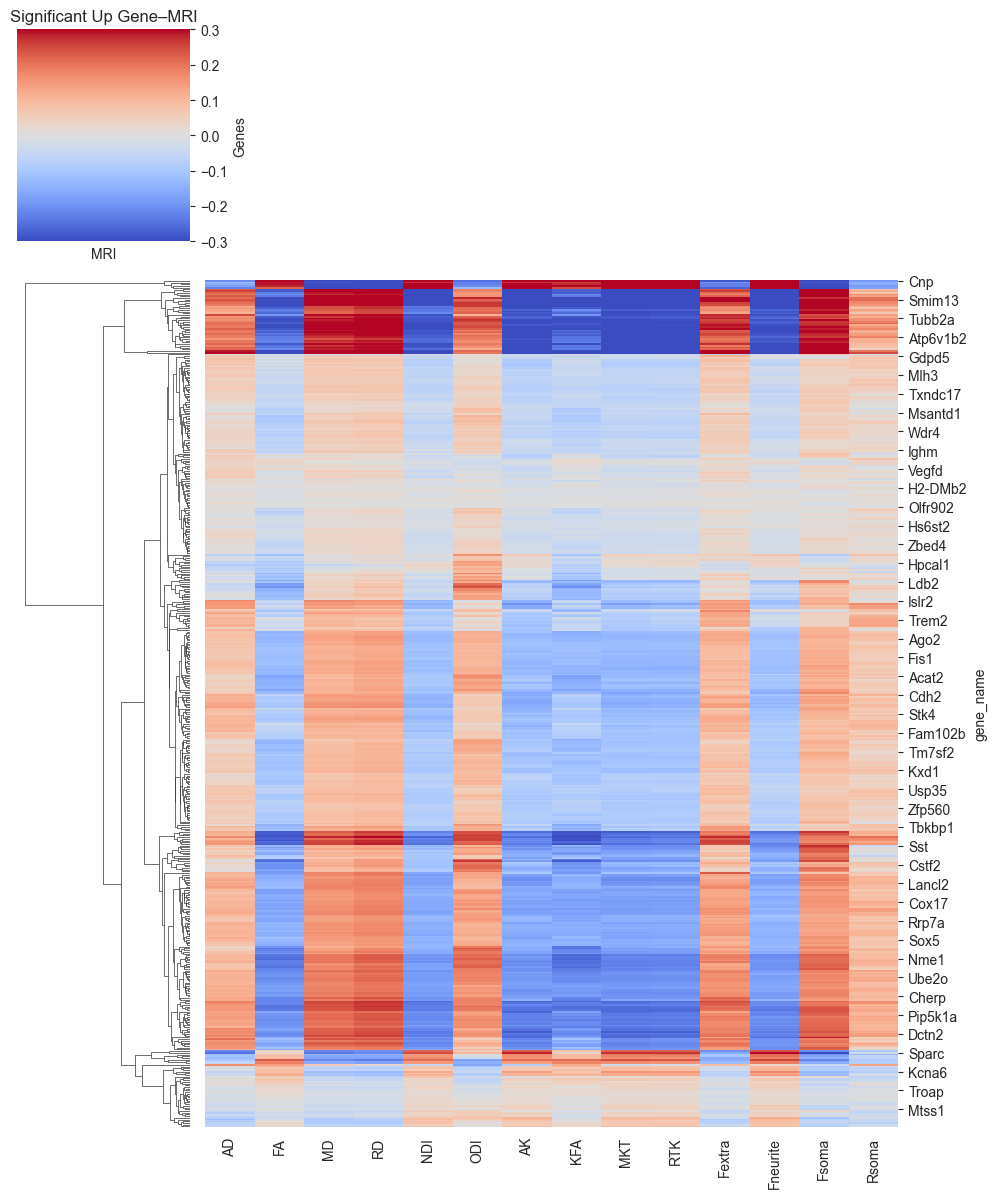

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load CSVs
# rvals = pd.read_csv("/Volumes/Wanglab_HDD1/UTSW/Xinyue/AD_Cell_Type/Data_for_plaque_comparison/results/spearman_gene_MRI_results_allgenes/up/spearman_r_matrix_allgenes.csv")     # rows = genes, columns = maps/MRIs
rvals = pd.read_csv("/Volumes/Wanglab_HDD1/UTSW/Xinyue/AD_Cell_Type/Data_for_correlation/spearmanrvalues_5xFAD_gene_addnames.csv")     # rows = genes, columns = maps/MRIs
genes = pd.read_csv("/Volumes/Wanglab_HDD1/UTSW/Xinyue/AD_Cell_Type/Data_for_plaque_comparison/results/Significant_up_genes_sortedbyp.csv")        # contains column 'gene_id'

# Ensure gene columns are strings
rvals["gene_name"] = rvals["gene_name"].astype(str)
genes["gene_id"] = genes["gene_id"].astype(str)

if "QSM" in rvals.columns:
    rvals = rvals.drop(columns=["QSM"])


desired_order = [
    "gene_name", "AD", "FA", "MD", "RD", "NDI", "ODI",
    "AK", "KFA", "MKT", "RTK",
    "Fextra", "Fneurite", "Fsoma", "Rsoma"
]

# Reorder columns (assumes all columns exist)
rvals = rvals[desired_order]


# Find intersection
common_genes = set(rvals["gene_name"]).intersection(genes["gene_id"])

print(f"Number of matched genes: {len(common_genes)}")

# Subset r-values table
rvals_sub = rvals[rvals["gene_name"].isin(common_genes)].copy()

# Set gene names as index
rvals_mat = rvals_sub.set_index("gene_name")

# Optional: sort genes for cleaner visualization
rvals_mat = rvals_mat.sort_index()

plt.figure(figsize=(10, max(6, 0.25 * rvals_mat.shape[0])))

sns.clustermap(
    rvals_mat,
    cmap="coolwarm",
    center=0,
    vmin=-0.3,
    vmax=0.3,
    figsize=(10, 12),
    row_cluster=True,
    col_cluster=False,
)
# sns.heatmap(
#     rvals_mat,
#     cmap="coolwarm",
#     center=0,
#     vmin=-0.3,
#     vmax=0.3,
#     linewidths=0.2,
#     cbar_kws={"label": "Spearman r"}
# )


plt.xlabel("MRI")
plt.ylabel("Genes")
plt.title("Significant Up Gene–MRI")

plt.tight_layout()
plt.savefig("/Volumes/Wanglab_HDD1/UTSW/Xinyue/AD_Cell_Type/Data_for_plaque_comparison/results/Significant Up gene_MRI_spearmanr_5xFAD_clustermap.png", dpi=300)
plt.show()
